# BUILD CNN FOR IMAGE CLASSIFICATION

# Image Augumentation

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
x_train = train_datagen.flow_from_directory(r'Flowers-Dataset/flowers',target_size=(64,64),class_mode='categorical')

Found 4317 images belonging to 5 classes.


In [27]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# Creating Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [29]:
model=Sequential()

# Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [30]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Conv2D(64,(3,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Flatten layer
# Dense layers
model.add(Dense(300,activation='relu')) # Hidden layer
model.add(Dense(150,activation='relu')) # Hidden layer
model.add(Dense(5,activation='softmax')) # Output layer

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 300)              

# Compile the Model

In [32]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x_train,
          steps_per_epoch=len(x_train),
          epochs=10)

Epoch 1/10
135/135 [==============================] - 67s 486ms/step - loss: 1.2907 - accuracy: 0.4575
Epoch 2/10
135/135 [==============================] - 38s 280ms/step - loss: 1.0901 - accuracy: 0.5513
Epoch 3/10
135/135 [==============================] - 37s 276ms/step - loss: 0.9969 - accuracy: 0.5979
Epoch 4/10
135/135 [==============================] - 37s 276ms/step - loss: 0.9328 - accuracy: 0.6342
Epoch 5/10
135/135 [==============================] - 37s 277ms/step - loss: 0.8689 - accuracy: 0.6634
Epoch 6/10
135/135 [==============================] - 37s 276ms/step - loss: 0.7938 - accuracy: 0.6901
Epoch 7/10
135/135 [==============================] - 37s 276ms/step - loss: 0.7271 - accuracy: 0.7148
Epoch 8/10
135/135 [==============================] - 37s 277ms/step - loss: 0.6536 - accuracy: 0.7498
Epoch 9/10
135/135 [==============================] - 37s 277ms/step - loss: 0.5936 - accuracy: 0.7674
Epoch 10/10
135/135 [==============================] - 37s 277ms/step - l

# Saving the Model

In [34]:
model.save('flowers.h5')

# Testing Model

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('flows.her5')

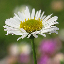

In [38]:
img = image.load_img(r'Flowers-Dataset/flowers/test1.jpg',target_size=(64,64))
img

In [39]:
print('LABELS..:',x_train.class_indices)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
print('PREDICTED VALUE:',y)
index=['daisy','dandelion','rose','sunflower','tulip']
print('FLOWERS IS...: ',index[y])

LABELS..: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
1/1 [==============================] - 0s 233ms/step
PREDICTED VALUE: 0
FLOWERS IS...:  daisy


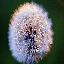

In [40]:
img = image.load_img(r'Flowers-Dataset/flowers/test2.jpg',target_size=(64,64))
img

In [41]:
print('LABELS..:',x_train.class_indices)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
print('PREDICTED VALUE:',y)
index=['daisy','dandelion','rose','sunflower','tulip']
print('FLOWERS IS...: ',index[y])

LABELS..: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
1/1 [==============================] - 0s 43ms/step
PREDICTED VALUE: 1
FLOWERS IS...:  dandelion


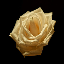

In [51]:
img = image.load_img(r'Flowers-Dataset/flowers/test3.jpg',target_size=(64,64))
img

In [52]:
print('LABELS..:',x_train.class_indices)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
print('PREDICTED VALUE:',y)
index=['daisy','dandelion','rose','sunflower','tulip']
print('FLOWERS IS...: ',index[y])

LABELS..: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
1/1 [==============================] - 0s 52ms/step
PREDICTED VALUE: 2
FLOWERS IS...:  rose


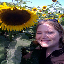

In [53]:
img = image.load_img(r'Flowers-Dataset/flowers/test4.jpg',target_size=(64,64))
img

In [54]:
print('LABELS..:',x_train.class_indices)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
print('PREDICTED VALUE:',y)
index=['daisy','dandelion','rose','sunflower','tulip']
print('FLOWERS IS...: ',index[y])

LABELS..: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
1/1 [==============================] - 0s 49ms/step
PREDICTED VALUE: 3
FLOWERS IS...:  sunflower


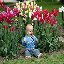

In [55]:
img = image.load_img(r'Flowers-Dataset/flowers/test5.jpg',target_size=(64,64))
img

In [56]:
print('LABELS..:',x_train.class_indices)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x))
print('PREDICTED VALUE:',y)
index=['daisy','dandelion','rose','sunflower','tulip']
print('FLOWERS IS...: ',index[y])

LABELS..: {'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}
1/1 [==============================] - 0s 55ms/step
PREDICTED VALUE: 4
FLOWERS IS...:  tulip
